In [1]:
#standard imports
import pandas as pd #pandas
import numpy as np #numpy
import pingouin as ping #one-liner anovas
import seaborn as sns #data viz
import matplotlib.pyplot as plt #data viz
from matplotlib.ticker import FormatStrFormatter #viz formatting

In [2]:
#Import data
data=pd.read_csv(r"C:\Users\Victoria Guzik\Downloads\mobile_total.csv")

In [3]:
#filter out users who didn't see an image/ have the opportunity to click
data_filtered=data[data["user_saw_image"]>0]

In [4]:
data_filtered

,exp,var,beacon,user_saw_image,user_clicked,total_impressions,total_clicks,user_participation,clicks_per_user
2,MobileImageReactionModule,mobile-image-reaction-bookmark,2jhammOZmz,1,0,1,0,0.0,NaN
3,MobileImageReactionModule,mobile-image-reaction-bookmark,2lU01lctwv,1,0,4,0,0.0,NaN
7,MobileImageReactionModule,mobile-image-reaction-bookmark,5rVoYh9DU5,1,0,1,0,0.0,NaN
10,MobileImageReactionModule,mobile-image-reaction-bookmark,6IK8T_Td1X,1,0,1,0,0.0,NaN
11,MobileImageReactionModule,mobile-image-reaction-bookmark,6QsfwvZeFD,1,0,1,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
358451,MobileImageReactionModule,mobile-image-reaction-thumbsup,jfvl-OSc98,1,0,3,0,0.0,NaN
358455,MobileImageReactionModule,mobile-image-reaction-thumbsup,oCb-MPlBgD,1,0,1,0,0.0,NaN
358456,MobileImageReactionModule,mobile-image-reaction-thumbsup,oYqfQcZLCk,1,0,2,0,0.0,NaN
358457,MobileImageReactionModule,mobile-image-reaction-thumbsup,pAJdYpl19X,1,0,2,0,0.0,NaN


In [9]:
#filter users who did click at least once
data_clicks=data_filtered[data_filtered["user_clicked"]>0]

In [10]:
data_clicks

,exp,var,beacon,user_saw_image,user_clicked,total_impressions,total_clicks,user_participation,clicks_per_user
36,MobileImageReactionModule,mobile-image-reaction-bookmark,G-0MZITWfo,1,1,186,2,1.0,2.0
159,MobileImageReactionModule,mobile-image-reaction-bookmark,G-jovZe-AV,1,1,87,2,1.0,2.0
174,MobileImageReactionModule,mobile-image-reaction-bookmark,G-oYR7o14M,1,1,141,2,1.0,2.0
186,MobileImageReactionModule,mobile-image-reaction-bookmark,G-ryanCFbQ,1,1,48,2,1.0,2.0
312,MobileImageReactionModule,mobile-image-reaction-bookmark,G0c9kN3pRE,1,1,25,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...
357245,MobileImageReactionModule,mobile-image-reaction-thumbsup,LtgD9or91P,1,1,5,2,1.0,2.0
357467,MobileImageReactionModule,mobile-image-reaction-thumbsup,Lurue3sNYa,1,1,42,1,1.0,1.0
357747,MobileImageReactionModule,mobile-image-reaction-thumbsup,LwCTHsQ0b6,1,1,73,2,1.0,2.0
358134,MobileImageReactionModule,mobile-image-reaction-thumbsup,LyLIMlJr4v,1,1,26,8,1.0,8.0


In [11]:
#run the ANOVA on the whole population
anova=ping.anova(data_clicks, dv="total_clicks", between="var")
print(anova)

  Source  ddof1  ddof2         F     p-unc      np2
0    var      4   1325  2.294711  0.057361  0.00688


In [12]:
#Tukey's HSD on the whole population
tk=ping.pairwise_tukey(data=data_clicks, dv="total_clicks", between="var", effsize='cohen')
tk_sig=tk[tk["p-tukey"]<0.05]
tk_sig

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen


In [13]:
#Randomly sample 200 of our total population
sample_week=data_clicks.sample(n=200, random_state=1)

In [14]:
#run the ANOVA on the sample
anova=ping.anova(sample_week, dv="total_clicks", between="var")
print(anova)

  Source  ddof1  ddof2         F     p-unc       np2
0    var      4    195  0.956463  0.432592  0.019242


In [15]:
#Tukey's HSD on the sample
ping.pairwise_tukey(data=sample_week, dv="total_clicks", between="var", effsize='cohen')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,mobile-image-reaction-bookmark,mobile-image-reaction-brand-fire,2.170732,2.000000,0.170732,1.516318,0.112596,0.900000,0.024441
1,mobile-image-reaction-bookmark,mobile-image-reaction-hearts,2.170732,2.914286,-0.743554,1.607607,-0.462522,0.900000,-0.106442
2,mobile-image-reaction-bookmark,mobile-image-reaction-star,2.170732,4.420000,-2.249268,1.471780,-1.528264,0.539347,-0.321990
3,mobile-image-reaction-bookmark,mobile-image-reaction-thumbsup,2.170732,2.200000,-0.029268,1.678324,-0.017439,0.900000,-0.004190
4,mobile-image-reaction-brand-fire,mobile-image-reaction-hearts,2.000000,2.914286,-0.914286,1.582167,-0.577869,0.900000,-0.130883
5,mobile-image-reaction-brand-fire,mobile-image-reaction-star,2.000000,4.420000,-2.420000,1.443949,-1.675960,0.452701,-0.346431
6,mobile-image-reaction-brand-fire,mobile-image-reaction-thumbsup,2.000000,2.200000,-0.200000,1.653972,-0.120921,0.900000,-0.028631
7,mobile-image-reaction-hearts,mobile-image-reaction-star,2.914286,4.420000,-1.505714,1.539535,-0.978032,0.849913,-0.215548
8,mobile-image-reaction-hearts,mobile-image-reaction-thumbsup,2.914286,2.200000,0.714286,1.738046,0.410971,0.900000,0.102252
9,mobile-image-reaction-star,mobile-image-reaction-thumbsup,4.420000,2.200000,2.220000,1.613238,1.376114,0.625223,0.317800


In [16]:
#import data from the 3 earliest days
data_abbrev=pd.read_csv(r"C:\Users\Victoria Guzik\Downloads\mobile_3_day.csv")

In [17]:
#filter users who did click at least once
data_clicks_abbrev=data_abbrev[data_abbrev["user_clicked"]>0]

In [18]:
#Randomly sample 200 of our abbreviated population
sample_abbrev=data_clicks_abbrev.sample(n=200, random_state=1)

In [19]:
#run the ANOVA on the sample
anova=ping.anova(sample_abbrev, dv="total_clicks", between="var")
print(anova)

  Source  ddof1  ddof2         F     p-unc       np2
0    var      4    195  0.586651  0.672676  0.011891


In [20]:
#Tukey's HSD on the sample
tk=ping.pairwise_tukey(data=sample_abbrev, dv="total_clicks", between="var", effsize='cohen')

In [21]:
## This time do everything based on participation rate not just clicks ##
data_filtered["CTR"]=data_filtered["total_clicks"]/data_filtered["total_impressions"]

<ipython-input-21-4b825bb72bca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["CTR"]=data_filtered["total_clicks"]/data_filtered["total_impressions"]


In [22]:
#run the ANOVA on the whole population
anova=ping.anova(data_filtered, dv="CTR", between="var")
print(anova)

  Source  ddof1   ddof2         F     p-unc      np2
0    var      4  195275  1.448017  0.215229  0.00003


In [23]:
#Tukey's HSD on the sample
tk=ping.pairwise_tukey(data=data_filtered, dv="CTR", between="var", effsize='cohen')
tk_sig=tk[tk["p-tukey"]<0.05]
tk_sig

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen


In [24]:
#Randomly sample 200 of our total population
sample_week_CTR=data_filtered.sample(n=200, random_state=3)

In [25]:
#run the ANOVA on the week long sample
anova=ping.anova(data=sample_week_CTR, dv="CTR", between="var")
print(anova)

  Source  ddof1  ddof2    F     p-unc       np2
0    var      4    195  1.0  0.408754  0.020101


In [26]:
#Tukey's HSD on the week long sample
ping.pairwise_tukey(data=sample_week_CTR, dv="CTR", between="var", effsize='cohen')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,mobile-image-reaction-bookmark,mobile-image-reaction-brand-fire,0.000,0.000,0.000,0.003124,0.000000,0.900000,0.000000
1,mobile-image-reaction-bookmark,mobile-image-reaction-hearts,0.000,0.000,0.000,0.003073,0.000000,0.900000,0.000000
2,mobile-image-reaction-bookmark,mobile-image-reaction-star,0.000,0.005,-0.005,0.003162,-1.581139,0.509503,-0.353553
3,mobile-image-reaction-bookmark,mobile-image-reaction-thumbsup,0.000,0.000,0.000,0.003326,0.000000,0.900000,0.000000
4,mobile-image-reaction-brand-fire,mobile-image-reaction-hearts,0.000,0.000,0.000,0.003034,0.000000,0.900000,0.000000
5,mobile-image-reaction-brand-fire,mobile-image-reaction-star,0.000,0.005,-0.005,0.003124,-1.600305,0.498605,-0.353553
6,mobile-image-reaction-brand-fire,mobile-image-reaction-thumbsup,0.000,0.000,0.000,0.003290,0.000000,0.900000,0.000000
7,mobile-image-reaction-hearts,mobile-image-reaction-star,0.000,0.005,-0.005,0.003073,-1.626978,0.482540,-0.353553
8,mobile-image-reaction-hearts,mobile-image-reaction-thumbsup,0.000,0.000,0.000,0.003241,0.000000,0.900000,0.000000
9,mobile-image-reaction-star,mobile-image-reaction-thumbsup,0.005,0.000,0.005,0.003326,1.503421,0.553369,0.353553


In [27]:
#import data from the 3 earliest days
data_abbrev=pd.read_csv(r"C:\Users\Victoria Guzik\Downloads\mobile_3_day.csv")

In [28]:
#filter users who did click at least once
data_CTR_abbrev=data_abbrev[data_abbrev["user_saw_image"]>0]
data_CTR_abbrev["CTR"]=data_CTR_abbrev["total_clicks"]/data_CTR_abbrev["total_impressions"]

<ipython-input-28-eea36c2c9836>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_CTR_abbrev["CTR"]=data_CTR_abbrev["total_clicks"]/data_CTR_abbrev["total_impressions"]


In [29]:
#Randomly sample 200 of our abbreviated population
sample_ctr_abbrev=data_CTR_abbrev.sample(n=200, random_state=2)

In [26]:
#run the ANOVA on the 3-day sample
anova=ping.anova(data=sample_ctr_abbrev, dv="CTR", between="var")
print(anova)

  Source  ddof1  ddof2         F     p-unc      np2
0    var      4    195  0.703204  0.590627  0.01422


In [27]:
#Tukey's HSD on the week long sample
ping.pairwise_tukey(data=sample_ctr_abbrev, dv="CTR", between="var", effsize='cohen')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,mobile-image-reaction-bookmark,mobile-image-reaction-brand-fire,0.000000,0.000386,-0.000386,0.000764,-0.504755,0.900000,-0.106649
1,mobile-image-reaction-bookmark,mobile-image-reaction-hearts,0.000000,0.001082,-0.001082,0.000780,-1.386824,0.619180,-0.299171
2,mobile-image-reaction-bookmark,mobile-image-reaction-star,0.000000,0.000000,0.000000,0.000816,0.000000,0.900000,0.000000
3,mobile-image-reaction-bookmark,mobile-image-reaction-thumbsup,0.000000,0.000000,0.000000,0.000873,0.000000,0.900000,0.000000
4,mobile-image-reaction-brand-fire,mobile-image-reaction-hearts,0.000386,0.001082,-0.000696,0.000755,-0.922430,0.881296,-0.192522
5,mobile-image-reaction-brand-fire,mobile-image-reaction-star,0.000386,0.000000,0.000386,0.000791,0.487493,0.900000,0.106649
6,mobile-image-reaction-brand-fire,mobile-image-reaction-thumbsup,0.000386,0.000000,0.000386,0.000851,0.453451,0.900000,0.106649
7,mobile-image-reaction-hearts,mobile-image-reaction-star,0.001082,0.000000,0.001082,0.000807,1.341233,0.644912,0.299171
8,mobile-image-reaction-hearts,mobile-image-reaction-thumbsup,0.001082,0.000000,0.001082,0.000865,1.250787,0.695961,0.299171
9,mobile-image-reaction-star,mobile-image-reaction-thumbsup,0.000000,0.000000,0.000000,0.000897,0.000000,0.900000,0.000000


In [30]:
#Is population click thru significant?
ping.ttest(data_filtered["CTR"], 0.015, paired=False, alternative='greater', correction='auto', r=0.707, confidence=0.95)

C:\Users\Victoria Guzik\anaconda3\lib\site-packages\pingouin\bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-207.755931,195279,greater,1.0,"[0.0, inf]",0.470137,0.0e+00,0.0


In [29]:
#Is 200 sample week-long click thru significant?
ping.ttest(sample_week_CTR['CTR'], 0.015, paired=False, alternative='greater', correction='auto', r=0.707, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-14.0,199,greater,1.0,"[-0.0, inf]",0.989949,3.098e-29,0.0


In [30]:
#Is 200 first 3 days click thru significant?
ping.ttest(sample_ctr_abbrev['CTR'], 0.015, paired=False, alternative='greater', correction='auto', r=0.707, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-57.519566,199,greater,1.0,"[-0.0, inf]",4.067247,5.162e-123,0.0


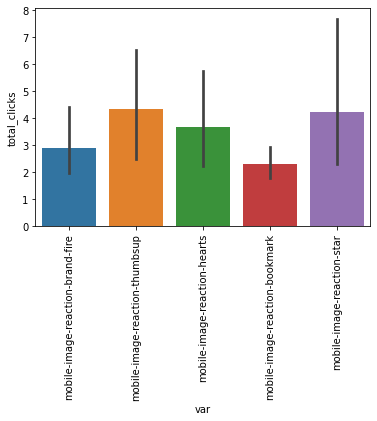

In [34]:
## Data Visualization ##
ax=sns.barplot(x="var", y="total_clicks", data=sample_abbrev)
ax.tick_params(axis='x', rotation=90)


In [49]:
counts=data_filtered.value_counts(["var", "user_clicked"]).reset_index()

In [53]:
counts_wide=counts.pivot_table(index="var", columns="user_clicked", values=0).reset_index()

In [55]:
counts_wide["total"]=counts_wide[0]+counts_wide[1]

In [57]:
counts_wide["Percent"]=counts_wide[1]/counts_wide["total"]

In [60]:
ping.ttest(counts_wide["Percent"], 0.0025, paired=False, alternative='greater', correction='auto', r=0.707, confidence=0.95) 

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,13.511536,4,greater,0.000087,"[0.01, inf]",6.042543,273.28,1.0
